In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/root/.virtualenvs/ENV-3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
tf.set_random_seed(1)
np.random.seed(1)

In [7]:
n_data = np.ones((100, 2))
x0 = np.random.normal(2 * n_data, 1)
y0 = np.zeros(100)
x1 = np.random.normal(-2 * n_data, 1)
y1 = np.ones(100)
x = np.vstack((x0, x1))
y = np.hstack((y0, y1))

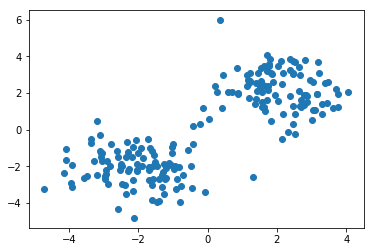

In [9]:
plt.scatter(x[:, 0], x[:, 1])

In [16]:
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.int32, y.shape)

In [17]:
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)
output = tf.layers.dense(l1, 2)append

In [20]:
loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output)
accuracy = tf.metrics.accuracy(labels=tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1),)[1]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

In [21]:
sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)

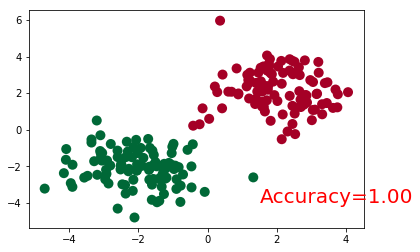

In [24]:
for i in range(1000):
    sess.run([train_op, accuracy, output], feed_dict={tf_x: x, tf_y: y})

_, acc, pred = sess.run([train_op, accuracy, output], feed_dict={tf_x: x, tf_y: y})

plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size': 20, 'color': 'red'})
plt.show()